In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Memuat dataset
file_path = "epl-goalScorer(20-21).csv"
df = pd.read_csv(file_path)

In [3]:
df.head(3)

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285


In [4]:
df.tail(7)

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
515,515,9395,Sidnei Tavares,2,84,0,0.020798,0,0.0,1,0,0,0,M S,Leicester,0,0.020798,0.020798,0.000000
516,516,9406,Nathan Broadhead,1,1,0,0.000000,0,0.0,0,0,0,0,S,Everton,0,0.000000,0.000000,0.000000
517,517,9415,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.0,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,518,9423,Gaetano Berardi,2,113,0,0.074761,0,0.0,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,519,9524,Anthony Elanga,1,67,0,0.000000,0,0.0,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,520,9540,Femi Seriki,1,1,0,0.000000,0,0.0,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000
521,521,9552,Tyrese Francois,1,13,0,0.000000,0,0.0,0,0,0,0,S,Fulham,0,0.000000,0.000000,0.000000


In [5]:
print(df.dtypes)

Unnamed: 0        int64
id                int64
player_name      object
games             int64
time              int64
goals             int64
xG              float64
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
position         object
team_title       object
npg               int64
npxG            float64
xGChain         float64
xGBuildup       float64
dtype: object


In [6]:
df_noid = df.iloc[:,2:]
df_noid

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,Gaetano Berardi,2,113,0,0.074761,0,0.000000,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,Anthony Elanga,1,67,0,0.000000,0,0.000000,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,Femi Seriki,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000


In [8]:
df1 = df.sort_values(by='player_name', ascending=True)
df1.head(10)

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
154,154,7991,Aaron Connolly,16,755,2,4.412464,1,0.149897,22,5,0,0,F M S,Brighton,2,4.412464,4.720931,0.191225
281,281,534,Aaron Cresswell,35,3086,0,0.883464,8,7.347331,19,57,3,0,D,West Ham,0,0.883464,10.609667,8.381824
390,390,5603,Aaron Ramsdale,37,3330,0,0.000000,0,0.053571,0,1,1,0,GK,Sheffield United,0,0.000000,2.794618,2.741047
139,139,5584,Aaron Wan-Bissaka,34,3060,2,0.932454,4,2.547663,7,31,3,0,D,Manchester United,2,0.932454,12.242123,9.676275
126,126,1726,Abdoulaye Doucouré,28,2409,2,2.369523,3,2.381616,18,20,6,0,M,Everton,2,2.369523,10.355722,6.733990
380,380,4866,Aboubakar Kamara,11,303,0,0.654920,0,0.328969,4,6,1,1,F M S,Fulham,0,0.654920,1.103215,0.182326
163,163,486,Adam Lallana,29,1528,1,1.614306,1,2.628758,22,25,0,0,F M S,Brighton,1,1.614306,9.719970,5.874305
242,242,7699,Adam Webster,28,2506,1,1.272957,0,0.253216,25,5,4,0,D,Brighton,1,1.272957,7.623944,7.481681
119,119,900,Adama Traoré,36,2604,2,1.995262,2,5.228081,41,54,4,0,D F M S,Wolverhampton Wanderers,2,1.995262,9.373142,3.006398
75,75,5556,Ademola Lookman,34,2765,4,6.251116,4,5.258407,69,61,5,0,F M S,Fulham,4,5.489947,15.355220,7.334159


In [10]:
df2 = df.sort_values(by=['time', 'games'], ascending=[False, True])
df2.head(10)

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
110,110,343,Pierre-Emile Højbjerg,38,3420,2,1.137927,4,1.755895,14,16,9,0,M,Tottenham,2,1.137927,16.205809,14.680379
296,296,637,Hugo Lloris,38,3420,0,0.000000,0,0.000000,0,0,0,0,GK,Tottenham,0,0.000000,4.801015,4.801015
311,311,745,Kasper Schmeichel,38,3420,0,0.000000,0,0.000000,0,0,0,0,GK,Leicester,0,0.000000,3.868818,3.868818
378,378,4401,Emiliano Martinez,38,3420,0,0.000000,0,0.122923,0,2,1,0,GK,Aston Villa,0,0.000000,3.730909,3.607986
40,40,8718,Stuart Dallas,38,3412,8,4.457074,2,2.084683,48,26,7,0,D M,Leeds,8,4.457074,18.534344,13.809802
327,327,884,Matt Targett,38,3407,0,0.280304,2,2.799669,6,39,7,0,D,Aston Villa,0,0.280304,9.610859,8.203313
480,480,8716,Luke Ayling,38,3400,0,1.439750,0,2.988854,24,26,7,0,D M,Leeds,0,1.439750,14.196262,11.884364
204,204,1688,Andrew Robertson,38,3391,1,1.437934,7,7.220492,19,65,2,0,D,Liverpool,1,1.437934,19.869482,15.435009
55,55,5956,Youri Tielemans,38,3359,6,4.168204,4,3.312251,48,49,6,0,M S,Leicester,4,2.645866,18.975342,14.945469
7,7,8865,Ollie Watkins,37,3330,14,16.280178,5,5.314029,98,45,2,1,F,Aston Villa,13,14.757840,22.014021,5.334991


In [11]:
df_noid.describe()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


In [12]:
df_noid[['goals', 'games', 'assists', 'shots']].mean()

,0
goals,1.862069
games,19.643678
assists,1.289272
shots,17.379310


In [13]:
df_noid[['goals', 'games', 'assists', 'shots']].median()

,0
goals,1.0
games,21.0
assists,0.0
shots,10.0


In [14]:
df_noid[['team_title']].mode()

,team_title
0,Everton
1,West Bromwich Albion


In [15]:
df_noid[['goals']].quantile(q=0.75)

,0.75
goals,2.0


In [16]:
df_noid[['goals']].var(), df_noid[['goals']].std()

(goals    11.147925
 dtype: float64,
 goals    3.338851
 dtype: float64)

In [19]:
mean = df_noid[['goals']].mean()
stdev = df_noid[['goals']].std()
iso = (df_noid[['goals']] < mean - 3 * stdev) | (df_noid[['goals']] > mean + 3 * stdev)
df1 = df_noid[['player_name', 'goals']].assign(is_outlier=iso)
df1.loc[df1['is_outlier'] == True]

,player_name,goals,is_outlier
0,Harry Kane,23,True
1,Mohamed Salah,22,True
2,Bruno Fernandes,18,True
3,Son Heung-Min,17,True
4,Patrick Bamford,17,True
5,Dominic Calvert-Lewin,16,True
6,Jamie Vardy,15,True
7,Ollie Watkins,14,True
8,Ilkay Gündogan,13,True
9,Alexandre Lacazette,13,True


In [20]:
q1 = df_noid['goals'].quantile(q=0.25)
q3 = df_noid['goals'].quantile(q=0.75)
iqr = q3- q1
iso = (df_noid['goals'] < q1 - 1.5*iqr) | (df_noid['goals'] > q3 + 1.5*iqr)
iseo = (df_noid['goals'] < q1 - 3*iqr) | (df_noid["goals"] > q3 + 3*iqr)
df1 = df_noid[['player_name', 'goals']].assign(is_outlier = iso, is_extreme_outlier = iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,player_name,goals,is_outlier,is_extreme_outlier
0,Harry Kane,23,True,True
1,Mohamed Salah,22,True,True
2,Bruno Fernandes,18,True,True
3,Son Heung-Min,17,True,True
4,Patrick Bamford,17,True,True
5,Dominic Calvert-Lewin,16,True,True
6,Jamie Vardy,15,True,True
7,Ollie Watkins,14,True,True
8,Ilkay Gündogan,13,True,True
9,Alexandre Lacazette,13,True,True


In [21]:
df['team_title'].value_counts()

,count
team_title,
Everton,28
West Bromwich Albion,28
Leicester,27
Liverpool,27
Southampton,27
Sheffield United,27
Wolverhampton Wanderers,27
Manchester United,27
Fulham,27


In [24]:
df_noid.groupby('team_title')[['goals']]\
    .mean().sort_values(by='goals', ascending=False)

,goals
team_title,
"Arsenal,Newcastle United",8.000000
Manchester City,3.208333
"Everton,Southampton",3.000000
"Aston Villa,Chelsea",3.000000
"Liverpool,Southampton",3.000000
Tottenham,2.750000
Leeds,2.608696
Manchester United,2.518519
West Ham,2.478261


In [27]:
# Select only numerical columns for correlation calculation
numerical_cols = df_noid.select_dtypes(include=np.number).columns
df_noid[numerical_cols].corr()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
games,1.000000,0.944591,0.439730,0.463869,0.504168,0.562806,0.599164,0.617867,0.565963,0.160326,0.437110,0.465546,0.726598,0.697196
time,0.944591,1.000000,0.398930,0.411203,0.473555,0.516638,0.529534,0.575065,0.592223,0.186333,0.392631,0.408231,0.703801,0.731377
goals,0.439730,0.398930,1.000000,0.932798,0.617490,0.607330,0.873363,0.567752,0.097151,0.053679,0.971591,0.905710,0.727953,0.290990
xG,0.463869,0.411203,0.932798,1.000000,0.636205,0.627495,0.910214,0.570488,0.093761,0.048815,0.894286,0.979218,0.763909,0.282746
assists,0.504168,0.473555,0.617490,0.636205,1.000000,0.885850,0.721220,0.835299,0.209349,-0.021444,0.587316,0.615503,0.752587,0.473254
xA,0.562806,0.516638,0.607330,0.627495,0.885850,1.000000,0.759568,0.946506,0.243912,0.006284,0.585152,0.611100,0.814487,0.547983
shots,0.599164,0.529534,0.873363,0.910214,0.721220,0.759568,1.000000,0.743370,0.249957,0.073932,0.852989,0.901386,0.843152,0.448197
key_passes,0.617867,0.575065,0.567752,0.570488,0.835299,0.946506,0.743370,1.000000,0.343357,0.022780,0.539726,0.545537,0.807958,0.618754
yellow_cards,0.565963,0.592223,0.097151,0.093761,0.209349,0.243912,0.249957,0.343357,1.000000,0.165064,0.093270,0.089065,0.401884,0.562467
red_cards,0.160326,0.186333,0.053679,0.048815,-0.021444,0.006284,0.073932,0.022780,0.165064,1.000000,0.055542,0.047354,0.104005,0.167660


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

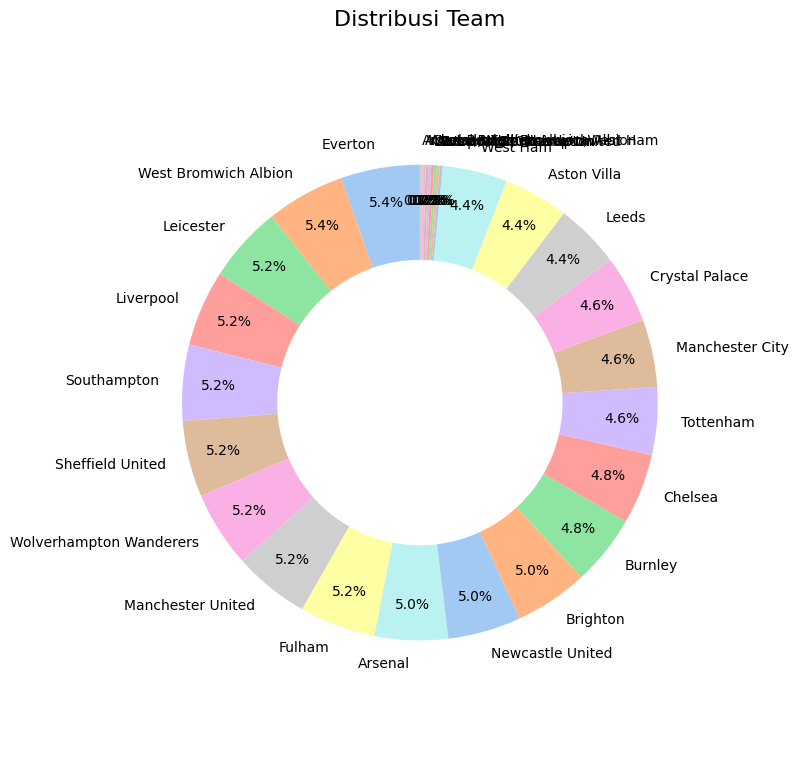

In [33]:
# Data untuk pie chart
data = df['team_title'].value_counts()

# Tentukan warna dengan seaborn color palette
colors = sns.color_palette('pastel')[0:len(data)]

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors,
        startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))

# Tambahkan judul dan pengaturan lainnya
plt.title("Distribusi Team", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

<ipython-input-36-063b1cdfe8bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team_title', y='goals', data=team_goals, palette='viridis')


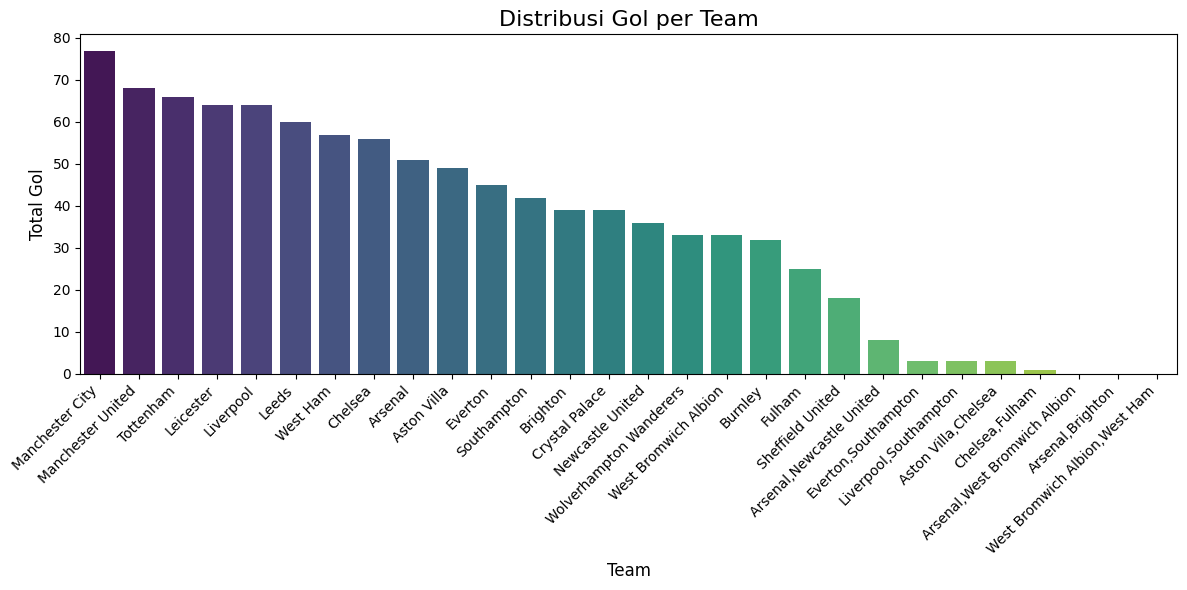

In [36]:
team_goals = df.groupby('team_title')['goals'].sum().reset_index()

# Sort by goals in descending order
team_goals = team_goals.sort_values(by=['goals'], ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='team_title', y='goals', data=team_goals, palette='viridis')
plt.title('Distribusi Gol per Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Gol', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

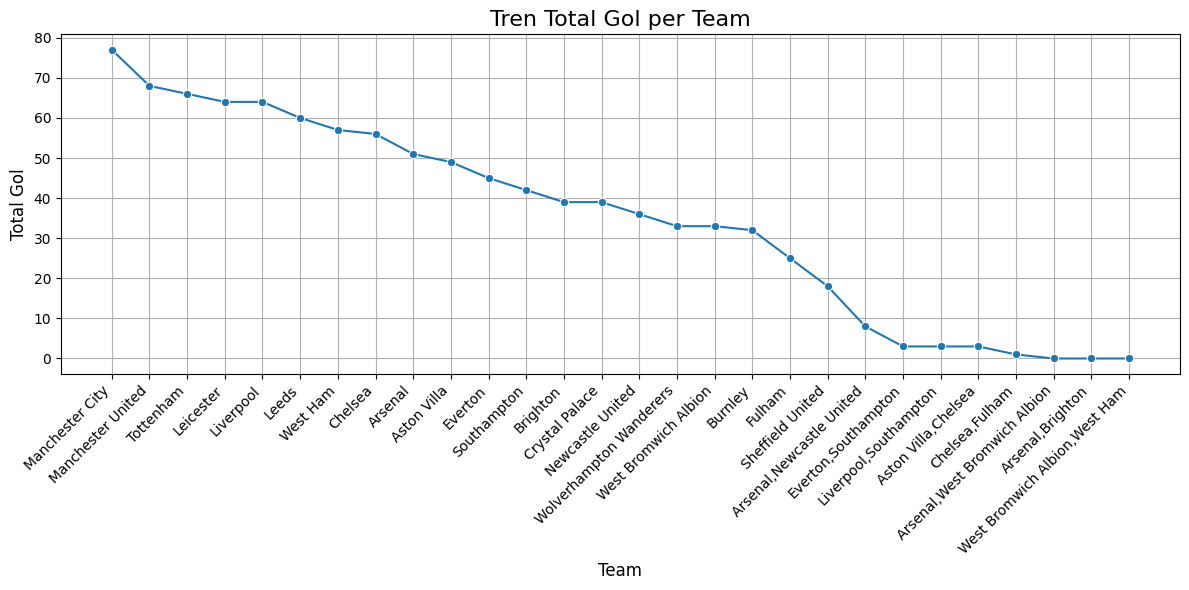

In [37]:
# Group data by team and sum goals
team_goals = df.groupby('team_title')['goals'].sum().reset_index()

# Sort by goals in descending order (optional)
team_goals = team_goals.sort_values(by=['goals'], ascending=False)

# Create the line graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(x='team_title', y='goals', data=team_goals, marker='o')  # Use marker='o' for data points
plt.title('Tren Total Gol per Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Gol', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.grid(True)  # Add gridlines for better readability
plt.show()

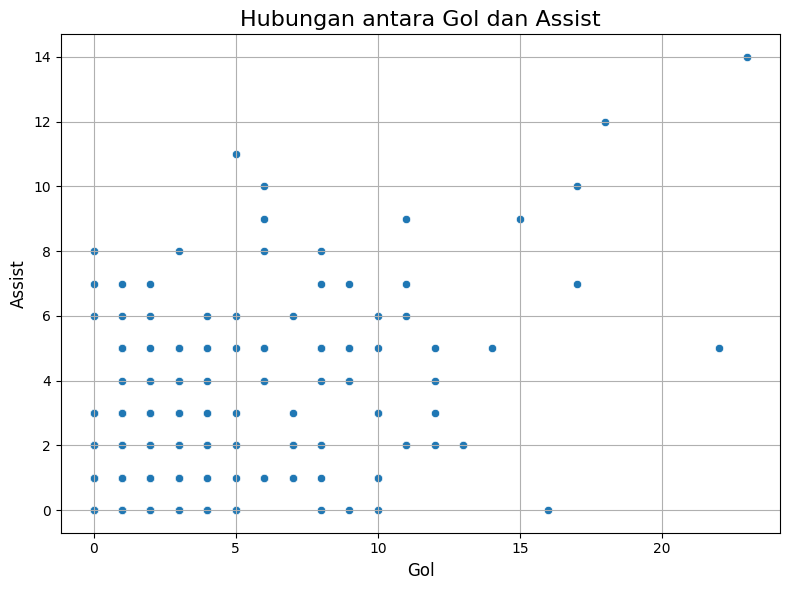

In [38]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='goals', y='assists', data=df_noid)
plt.title('Hubungan antara Gol dan Assist', fontsize=16)
plt.xlabel('Gol', fontsize=12)
plt.ylabel('Assist', fontsize=12)
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()

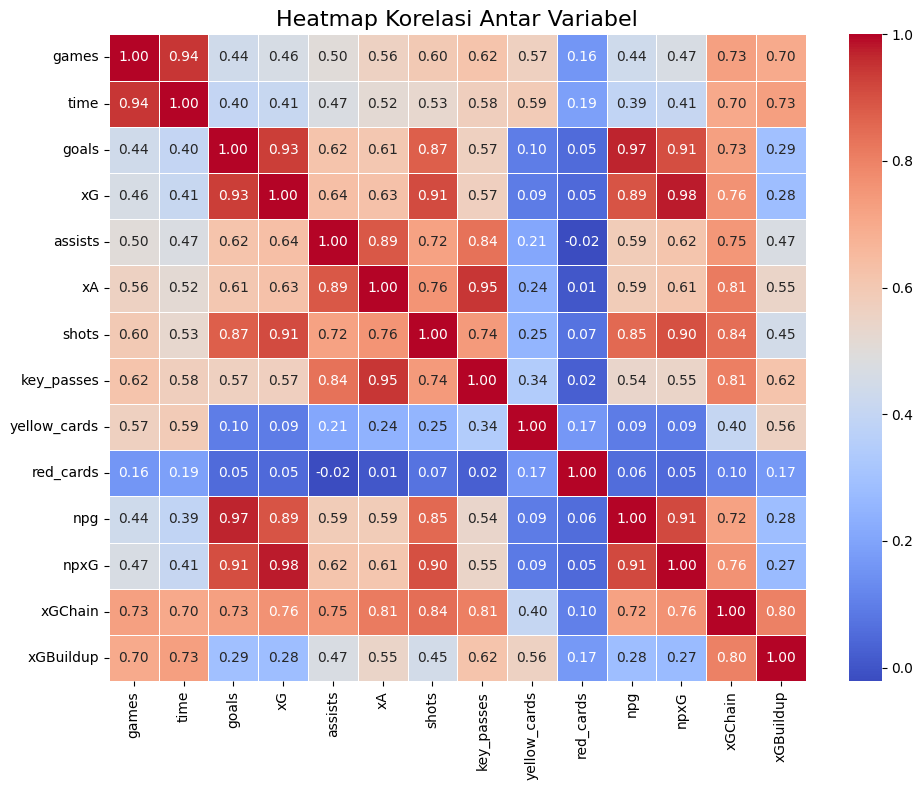

In [39]:
# Select only numerical columns for correlation calculation
numerical_cols = df_noid.select_dtypes(include=np.number).columns
corr_matrix = df_noid[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel', fontsize=16)
plt.tight_layout()
plt.show()

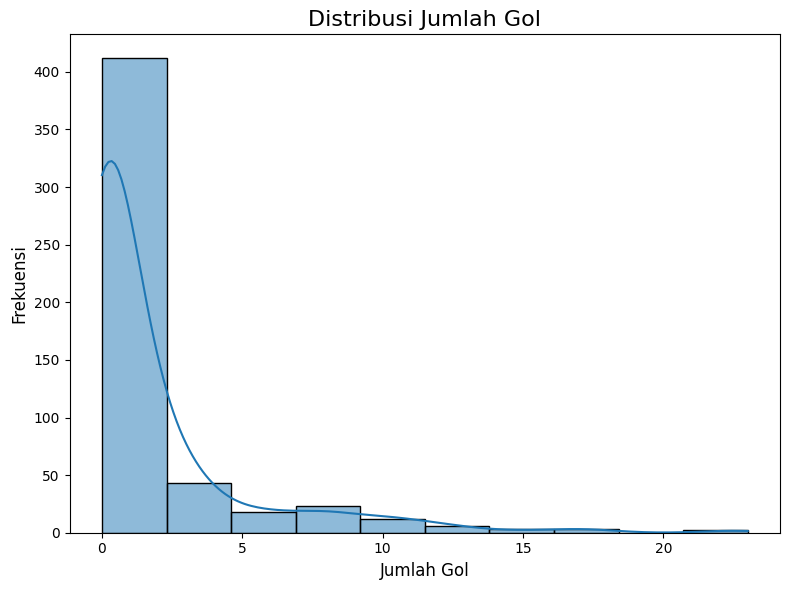

In [40]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.histplot(data=df_noid, x='goals', bins=10, kde=True)
plt.title('Distribusi Jumlah Gol', fontsize=16)
plt.xlabel('Jumlah Gol', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
# Calculate correlation
correlation = df['goals'].corr(df['assists'])

print(f"Correlation between goals and assists: {correlation}")

Correlation between goals and assists: 0.6174897264218215


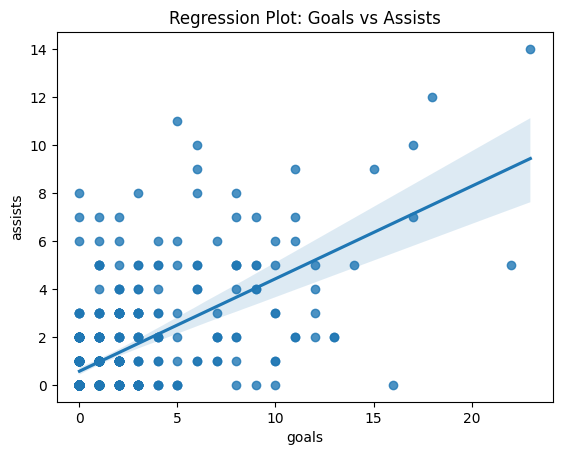

In [45]:
# Create regplot
sns.regplot(x='goals', y='assists', data=df)
plt.title('Regression Plot: Goals vs Assists')
plt.show()

In [46]:
# Group data by position and calculate mean goals
grouped_data = df.groupby('position')['goals'].mean()

print(grouped_data)

position
D           0.945455
D F M S     2.375000
D M         1.625000
D M S       0.693878
D S         0.610390
F          13.666667
F M         9.000000
F M S       4.826667
F S         5.200000
GK          0.027778
GK S        0.000000
M           2.750000
M S         1.669811
S           0.000000
Name: goals, dtype: float64


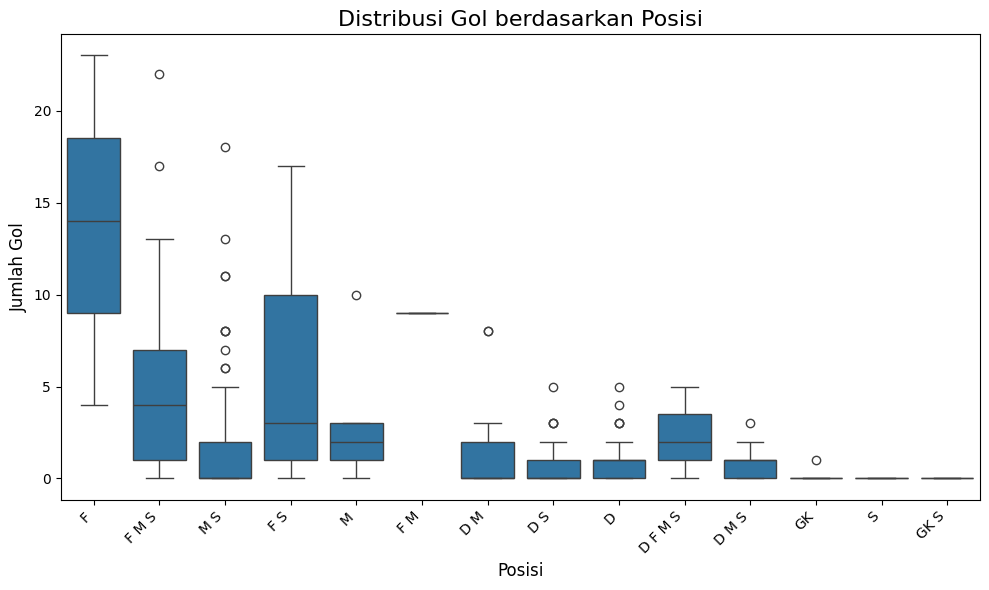

In [47]:
# Create the boxplot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='position', y='goals', data=df)
plt.title('Distribusi Gol berdasarkan Posisi', fontsize=16)
plt.xlabel('Posisi', fontsize=12)
plt.ylabel('Jumlah Gol', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [48]:
# Group data by position
groups = df.groupby('position')['goals'].apply(list)

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(*groups)

print(f"F-value: {fvalue}")
print(f"P-value: {pvalue}")

F-value: 21.638640149350632
P-value: 5.495338222001096e-41
